<a href="https://colab.research.google.com/github/arlenkim/study/blob/main/55C3_US_RFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from warnings import filterwarnings
filterwarnings('ignore')
%config InlineBackend.figure_format="retina"
matplotlib.rcParams['figure.figsize'] = (6,4)
matplotlib.rcParams.update({'font.size': 13})

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/content/drive/MyDrive/Colab Notebooks/11-15.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/11-15.ipynb
/content/drive/MyDrive/Colab Notebooks/b52_Regression.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/wine.ipynb
/content/drive/MyDrive/Colab Notebooks/mushroom.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/car_evaluation.csv
/content/drive/MyDrive/Colab Notebooks/car_evaluation.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/55C3_US_3rd_data.csv
/content/drive/MyDrive/Colab Notebooks/b56_DT_RF_Boost_Reg.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/55C3_US_RFR.ipynb의 사본 (1)
/content/drive/MyDrive/Colab Notebooks/55C3_US_RFR.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/Untitled0.ipynb
/content/drive/MyDrive/Colab Notebooks/55C3_US_RFR.ipynb
/content/drive/MyDrive/Colab Notebooks/65C3_US_RFR.ipynb
/content/drive/MyDrive/Colab Notebooks/mushroom.ipynb


In [5]:
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn import tree
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error,r2_score               
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [ ]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (36.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [6]:
# DATA 다운
df = pd.read_csv("https://raw.githubusercontent.com/arlenkim/study/main/55C3_US_3rd_data_new.csv",encoding='euc-kr',header=1)

In [7]:
# view dimensions of dataset

df.head(5)

,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,...,상부,판정,하부,판정.1,좌측,판정.2,우측,판정.3,작업일시.6,박스바코드
0,3,2022-11-07,14,2022-11-07 10:58,7,ACQ30454407,"55"" Titan(GI)",SACQ30454407KFA2N7300E,휨검사,NaN,...,-1.44,1,-1.68,1,-0.81,1,-0.57,1,NaN,NaN
1,3,2022-11-07,16,2022-11-07 11:05,7,ACQ30454407,"55"" Titan(GI)",SACQ30454407KFA2N7300G,휨검사,NaN,...,-2.10,0,-1.98,1,-1.00,1,-0.58,1,NaN,NaN
2,3,2022-11-07,17,2022-11-07 11:15,7,ACQ30454407,"55"" Titan(GI)",SACQ30454407KFA2N7300H,휨검사,NaN,...,-2.08,0,-2.11,1,-0.88,1,-0.50,1,NaN,NaN
3,3,2022-11-07,18,2022-11-07 11:41,7,ACQ30454407,"55"" Titan(GI)",SACQ30454407KFA2N7300J,휨검사,NaN,...,-2.71,0,-1.88,1,-0.79,1,-1.17,1,NaN,NaN
4,3,2022-11-07,20,2022-11-07 11:52,7,ACQ30454407,"55"" Titan(GI)",SACQ30454407KFA2N7300L,휨검사,NaN,...,-2.31,0,-2.21,1,-0.94,1,-0.58,1,NaN,NaN


In [8]:
df.shape

(2654, 272)

In [ ]:
#df3.columns[0:290]

In [ ]:
#for i in range(7, 11): 
  #df2 = df.drop(['i:사용여부'], axis=1)

In [9]:
df2 = df.drop(['작업일자', '순번','모델번호', '모델코드', '모델이름','최종공정','선택','탱크온도', '호스온도', '노즐온도','작업일시','작업일시.1', '작업일시.2','작업횟수','작업일시.3', '작업횟수.1','작업일시.4', '작업일시.5','작업일시.6', '박스바코드',
               '1:사용여부','1:평균출력2','1:평균출력3',
               '2:사용여부','2:평균출력2','2:평균출력3',
               '3:사용여부','3:평균출력2','3:평균출력3',
               '4:사용여부','4:평균출력2','4:평균출력3',
               '5:사용여부','5:평균출력2','5:평균출력3',
               '6:사용여부','6:평균출력2','6:평균출력3',
               '7:사용여부','7:평균출력2','7:평균출력3',
               '8:사용여부','8:평균출력2','8:평균출력3',
               '9:사용여부','9:평균출력2','9:평균출력3',
               '10:사용여부','10:평균출력2','10:평균출력3',
               '11:사용여부','11:평균출력2','11:평균출력3',
               '12:사용여부','12:평균출력2','12:평균출력3',
               '13:사용여부','13:평균출력2','13:평균출력3',
               '14:사용여부','14:평균출력2','14:평균출력3',
               '15:사용여부','15:평균출력2','15:평균출력3',
               '16:사용여부','16:평균출력2','16:평균출력3',
               '17:사용여부','17:평균출력2','17:평균출력3',
               '18:사용여부','18:평균출력2','18:평균출력3',
               '19:사용여부','19:평균출력2','19:평균출력3',
               '20:사용여부','20:평균출력2','20:평균출력3',
               '21:사용여부','21:평균출력2','21:평균출력3',
               '22:사용여부','22:평균출력2','22:평균출력3',
               '23:사용여부','23:평균출력2','23:평균출력3',
               '24:사용여부','24:평균출력2','24:평균출력3',
               '1:압력', '1:시간', '1:진폭', '1:주파수',
               '2:압력', '2:시간', '2:진폭', '2:주파수',
               '3:압력', '3:시간', '3:진폭', '3:주파수',
               '4:압력', '4:시간', '4:진폭', '4:주파수',
               '5:압력', '5:시간', '5:진폭', '5:주파수',
               '6:압력', '6:시간', '6:진폭', '6:주파수',
               '7:압력', '7:시간', '7:진폭', '7:주파수',
               '8:압력', '8:시간', '8:진폭', '8:주파수',
               '9:압력', '9:시간', '9:진폭', '9:주파수',
               '10:압력', '10:시간', '10:진폭', '10:주파수',
               '11:압력', '11:시간', '11:진폭', '11:주파수',
               '12:압력', '12:시간', '12:진폭', '12:주파수',
               '13:압력', '13:시간', '13:진폭', '13:주파수',
               '14:압력', '14:시간', '14:진폭', '14:주파수',
               '15:압력', '15:시간', '15:진폭', '15:주파수',
               '16:압력', '16:시간', '16:진폭', '16:주파수',
               '17:압력', '17:시간', '17:진폭', '17:주파수',
               '18:압력', '18:시간', '18:진폭', '18:주파수',
               '19:압력', '19:시간', '19:진폭', '19:주파수',
               '20:압력', '20:시간', '20:진폭', '20:주파수',
               '21:압력', '21:시간', '21:진폭', '21:주파수',
               '22:압력', '22:시간', '22:진폭', '22:주파수',
               '23:압력', '23:시간', '23:진폭', '23:주파수',
               '24:압력', '24:시간', '24:진폭', '24:주파수',               
               ], axis=1)

In [10]:
df2.shape

(2654, 84)

In [11]:
df2.head()

,라인,생성일시,바코드,1:에너지,1:최대출력,1:평균출력1,2:에너지,2:최대출력,2:평균출력1,3:에너지,...,24:평균출력1,종합판정,상부,판정,하부,판정.1,좌측,판정.2,우측,판정.3
0,3,2022-11-07 10:58,SACQ30454407KFA2N7300E,3668,2187,2059,3826,2231,1987,4512,...,890,1,-1.44,1,-1.68,1,-0.81,1,-0.57,1
1,3,2022-11-07 11:05,SACQ30454407KFA2N7300G,3746,2192,2102,3927,2406,2033,4644,...,953,0,-2.10,0,-1.98,1,-1.00,1,-0.58,1
2,3,2022-11-07 11:15,SACQ30454407KFA2N7300H,3852,2213,2149,3843,2363,1985,4636,...,972,0,-2.08,0,-2.11,1,-0.88,1,-0.50,1
3,3,2022-11-07 11:41,SACQ30454407KFA2N7300J,3784,2170,2135,4005,2395,2101,4538,...,988,0,-2.71,0,-1.88,1,-0.79,1,-1.17,1
4,3,2022-11-07 11:52,SACQ30454407KFA2N7300L,3341,2136,1871,4036,2445,2112,4580,...,788,0,-2.31,0,-2.21,1,-0.94,1,-0.58,1


In [12]:
df2.dtypes

라인          int64
생성일시       object
바코드        object
1:에너지       int64
1:최대출력      int64
           ...   
판정.1        int64
좌측        float64
판정.2        int64
우측        float64
판정.3        int64
Length: 84, dtype: object

In [13]:
df2.describe()

,라인,1:에너지,1:최대출력,1:평균출력1,2:에너지,2:최대출력,2:평균출력1,3:에너지,3:최대출력,3:평균출력1,...,24:평균출력1,종합판정,상부,판정,하부,판정.1,좌측,판정.2,우측,판정.3
count,2654.0,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,...,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.0,2654.000000,2654.0
mean,3.0,3733.991334,2231.387717,2005.707234,3608.626225,2220.587415,1967.858704,3851.978900,2263.514695,2096.553127,...,1171.626601,0.974755,-1.047675,0.976262,-1.671304,0.989073,-0.698466,1.0,-0.279318,1.0
std,0.0,226.240305,144.257408,117.020704,245.159441,127.388785,115.623500,170.504215,93.946462,81.341708,...,85.428679,0.156898,0.622339,0.152260,0.488185,0.103979,0.250936,0.0,0.275253,0.0
min,3.0,2858.000000,1677.000000,1523.000000,2923.000000,1783.000000,1610.000000,3021.000000,1964.000000,1611.000000,...,788.000000,0.000000,-3.730000,0.000000,-4.230000,0.000000,-1.650000,1.0,-1.220000,1.0
25%,3.0,3591.250000,2120.000000,1935.000000,3459.000000,2134.000000,1896.000000,3771.000000,2202.250000,2053.000000,...,1138.000000,1.000000,-1.380000,1.000000,-1.920000,1.000000,-0.810000,1.0,-0.380000,1.0
50%,3.0,3758.000000,2231.000000,2014.000000,3562.000000,2218.000000,1949.000000,3861.000000,2258.000000,2099.000000,...,1185.000000,1.000000,-1.170000,1.000000,-1.650000,1.000000,-0.660000,1.0,-0.210000,1.0
75%,3.0,3890.750000,2340.000000,2080.000000,3693.000000,2307.000000,2023.000000,3945.000000,2319.000000,2144.000000,...,1228.000000,1.000000,-0.960000,1.000000,-1.392500,1.000000,-0.540000,1.0,-0.100000,1.0
max,3.0,4342.000000,2587.000000,2312.000000,4410.000000,2636.000000,2375.000000,4644.000000,2861.000000,2414.000000,...,1417.000000,1.000000,0.910000,1.000000,0.530000,1.000000,0.020000,1.0,0.310000,1.0


In [14]:
df2.isnull().sum()

라인        0
생성일시      0
바코드       0
1:에너지     0
1:최대출력    0
         ..
판정.1      0
좌측        0
판정.2      0
우측        0
판정.3      0
Length: 84, dtype: int64

In [15]:
df2 = df2.replace(0, np.NaN)

In [16]:
df3 =df2.dropna(axis=0) 
df3.shape

(2512, 84)

In [17]:
df3.isnull().sum()

라인        0
생성일시      0
바코드       0
1:에너지     0
1:최대출력    0
         ..
판정.1      0
좌측        0
판정.2      0
우측        0
판정.3      0
Length: 84, dtype: int64

In [18]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 60

In [19]:
df3.sort_values(by='10:평균출력1',ascending=False)

,라인,생성일시,바코드,1:에너지,1:최대출력,1:평균출력1,2:에너지,2:최대출력,2:평균출력1,3:에너지,3:최대출력,3:평균출력1,4:에너지,4:최대출력,4:평균출력1,5:에너지,5:최대출력,5:평균출력1,6:에너지,6:최대출력,6:평균출력1,7:에너지,7:최대출력,7:평균출력1,8:에너지,8:최대출력,8:평균출력1,9:에너지,9:최대출력,9:평균출력1,10:에너지,10:최대출력,10:평균출력1,11:에너지,11:최대출력,11:평균출력1,12:에너지,12:최대출력,12:평균출력1,13:에너지,13:최대출력,13:평균출력1,14:에너지,14:최대출력,14:평균출력1,15:에너지,15:최대출력,15:평균출력1,16:에너지,16:최대출력,16:평균출력1,17:에너지,17:최대출력,17:평균출력1,18:에너지,18:최대출력,18:평균출력1,19:에너지,19:최대출력,19:평균출력1,20:에너지,20:최대출력,20:평균출력1,21:에너지,21:최대출력,21:평균출력1,22:에너지,22:최대출력,22:평균출력1,23:에너지,23:최대출력,23:평균출력1,24:에너지,24:최대출력,24:평균출력1,종합판정,상부,판정,하부,판정.1,좌측,판정.2,우측,판정.3
5,3,2022-11-07 11:53,SACQ30454407KFA2N7300M,3626,2147,1926,4000,2362,2140,4518,2861,2353,3886.0,2224.0,2077.0,5323.0,2979,2777,3745,2824,2055,5001,2886,2653,2653,1774,1586,3061,2053,1851,3983,2726,2443,3224,2048,1886,3604,2545,2241,2907,2090,1961,3051,1888,1802,1714,1160,974,3426,2086,2055,3858,2421,2303,3577,2193,2161,3519,2382,2063,3664,2522,2272,3724,2332,2259,3524,2173,2116,3445,2372,2108,1328,1108,866,1.0,-1.98,1.0,-1.95,1.0,-0.94,1,-0.62,1
220,3,2022-11-07 17:19,SACQ30454407KFA2N7307P,3930,2116,2055,4157,2296,2170,4256,2463,2297,4741.0,2876.0,2536.0,4334.0,2556,2282,4569,2776,2393,5014,2784,2687,2530,1677,1508,2998,2063,1833,4009,2647,2443,2937,1968,1782,2956,1950,1821,2453,1775,1775,2599,1863,1528,1874,1156,1081,3318,2038,1991,3719,2293,2230,3397,2084,2025,3249,2186,1890,3467,2290,2059,3616,2222,2165,3315,2048,1986,3479,2239,2107,1636,1075,997,1.0,-1.01,1.0,-2.09,1.0,-0.68,1,-0.27,1
224,3,2022-11-07 17:21,SACQ30454407KFA2N7307T,3847,2112,2001,4353,2461,2338,4329,2434,2314,4395.0,2588.0,2369.0,4481.0,2524,2391,4486,2948,2273,4784,2805,2552,2832,1843,1751,3294,2390,2111,3926,2528,2397,3065,2272,1977,3312,2178,2080,2601,2013,2013,2616,1835,1578,1822,1136,1042,3456,2094,2051,3412,2189,2018,3532,2188,2117,3304,2132,1895,3634,2355,2177,3571,2185,2114,3396,2073,2021,3511,2220,2118,1665,1151,1013,1.0,-0.93,1.0,-2.03,1.0,-0.76,1,-0.06,1
321,3,2022-11-08 9:09,SACQ30454407KFA2N8302S,3905,2238,2107,4156,2404,2215,3962,2272,2147,4561.0,2908.0,2444.0,4510.0,2554,2339,4474,2842,2281,4918,2945,2569,2467,1602,1476,3204,2250,1964,3811,2538,2389,3073,2026,1820,3312,2418,1988,2759,1966,1966,2538,1808,1477,1806,1160,1082,3490,2080,2047,3593,2325,2123,3507,2194,2111,3381,2328,1991,3590,2319,2125,3544,2148,2110,3449,2109,2058,3558,2259,2157,1655,1148,1021,1.0,-1.56,1.0,-2.44,1.0,-0.79,1,-0.21,1
35,3,2022-11-07 15:42,SACQ30454407KFA2N73028,3827,2106,2018,4122,2479,2227,3880,2268,2122,4522.0,2847.0,2456.0,4403.0,2566,2344,4421,2410,2156,4867,2781,2593,2408,1667,1462,2910,2099,1837,3929,2469,2384,2970,1884,1801,3068,2102,1928,2661,1774,1771,2197,1615,1257,1784,1162,1036,3421,2068,1994,3455,2312,2019,3485,2131,2102,3376,2102,1937,3456,2243,2078,3632,2227,2172,3570,2146,2118,3555,2257,2152,1631,1109,1005,1.0,-1.47,1.0,-2.08,1.0,-0.48,1,-0.07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,3,2022-11-08 11:09,SACQ30454407KFA2N83092,3209,2074,1759,3119,1914,1705,3544,2210,1946,3897.0,2211.0,2057.0,3923.0,2184,2109,3880,2061,2031,4255,2472,2347,2252,1686,1340,2575,1695,1525,2255,1578,1298,2790,1922,1647,2766,2106,1750,2191,1682,1682,2268,1665,1280,1878,1203,1121,3099,1904,1855,3359,2267,2017,3108,2036,1916,2743,1772,1668,3600,2289,2120,3408,2185,2049,3204,2124,1987,3013,2130,1870,1923,1157,1130,1.0,-1.80,1.0,-2.28,1.0,-1.49,1,-1.13,1
2344,3,2022-11-14 11:52,SACQ30454407KFA2NE30BL,3718,2189,1980,3496,2203,1909,3820,2250,2074,4201.0,2330.0,2181.0,4249.0,2497,2278,3904,2183,1980,4458,2538,2389,2350,1629,1351,2618,1746,1565,2242,1465,1298,2895,1767,1707,3150,2072,1899,2296,1751,1751,2435,1819,1434,1956,1217,1140,3054,1851,1835,3577,2368,2145,3179,2040,1948,3121,1879,1839,3509,2

In [52]:
df3.describe()

,라인,1:에너지,1:최대출력,1:평균출력1,2:에너지,2:최대출력,2:평균출력1,3:에너지,3:최대출력,3:평균출력1,4:에너지,4:최대출력,4:평균출력1,5:에너지,5:최대출력,5:평균출력1,6:에너지,6:최대출력,6:평균출력1,7:에너지,7:최대출력,7:평균출력1,8:에너지,8:최대출력,8:평균출력1,9:에너지,9:최대출력,9:평균출력1,10:에너지,10:최대출력,10:평균출력1,11:에너지,11:최대출력,11:평균출력1,12:에너지,12:최대출력,12:평균출력1,13:에너지,13:최대출력,13:평균출력1,14:에너지,14:최대출력,14:평균출력1,15:에너지,15:최대출력,15:평균출력1,16:에너지,16:최대출력,16:평균출력1,17:에너지,17:최대출력,17:평균출력1,18:에너지,18:최대출력,18:평균출력1,19:에너지,19:최대출력,19:평균출력1,20:에너지,20:최대출력,20:평균출력1,21:에너지,21:최대출력,21:평균출력1,22:에너지,22:최대출력,22:평균출력1,23:에너지,23:최대출력,23:평균출력1,24:에너지,24:최대출력,24:평균출력1,종합판정,상부,판정,하부,판정.1,좌측,판정.2,우측,판정.3
count,2512.0,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.0,2512.000000,2512.0,2512.000000,2512.0,2512.000000,2512.0,2512.000000,2512.0
mean,3.0,3731.645701,2233.040605,2005.121417,3599.657643,2218.489650,1964.166799,3847.195064,2261.785430,2094.456608,4296.312500,2493.139331,2299.804936,4184.437898,2430.743631,2275.740446,4247.762739,2429.798567,2222.563296,4730.351911,2727.246815,2558.261146,2507.954618,1671.472930,1481.601911,2901.862659,1975.458997,1745.105096,2893.183121,1931.777866,1729.235669,2878.332006,1922.788615,1721.479299,2998.855892,2010.844347,1826.944268,2467.755971,1840.087182,1834.841162,2443.964968,1741.822452,1405.895303,1994.914013,1297.389331,1169.404857,3266.047373,2016.674363,1964.373010,3457.895701,2291.117436,2077.365844,3298.741242,2090.207404,1991.623408,3287.578822,2043.251990,1938.674363,3588.492038,2265.259156,2115.226513,3477.898885,2193.691083,2069.773089,3231.189092,2097.166799,1964.641322,3253.851911,2147.068471,1992.200239,1978.608678,1242.501194,1174.844347,1.0,-1.016632,1.0,-1.643002,1.0,-0.695537,1.0,-0.274769,1.0
std,0.0,227.247133,144.996538,117.821855,238.604588,128.100107,113.576619,166.101158,91.102809,79.832684,237.266452,165.992924,131.589629,219.044159,82.149195,109.144803,238.636730,192.095523,124.470869,181.460655,117.280429,88.346352,187.546887,123.394121,117.341822,228.891048,186.715203,145.904884,350.836280,217.959218,215.966984,179.909348,137.984171,112.162902,173.489315,129.802457,106.415662,199.545045,157.120961,158.032630,149.233596,122.956842,86.572202,145.578574,105.652250,94.194130,80.451670,54.606706,47.526469,101.266541,81.004556,64.010480,117.910235,63.097198,65.589645,136.208675,99.121179,76.380015,82.142783,60.659925,54.040540,108.954998,52.674153,74.863983,125.109225,49.497914,71.945989,146.853561,53.262506,77.041095,147.441832,80.395230,83.052910,0.0,0.574778,0.0,0.434682,0.0,0.246867,0.0,0.267053,0.0
min,3.0,2858.000000,1677.000000,1523.000000,2923.000000,1783.000000,1610.000000,3021.000000,1964.000000,1611.000000,3307.000000,1872.000000,1772.000000,4.000000,1689.000000,1400.000000,2501.000000,1687.000000,1432.000000,3994.000000,2299.000000,2208.000000,2038.000000,1249.000000,1167.000000,2242.000000,1472.000000,1324.000000,2109.000000,1366.000000,1204.000000,2291.000000,1423.000000,1343.000000,2305.000000,1572.000000,1415.000000,1927.000000,1360.000000,1360.000000,1995.000000,1269.000000,1084.000000,1495.000000,990.000000,907.000000,2894.000000,1795.000000,1746.000000,3141.000000,1981.000000,1875.000000,2811.000000,1872.000000,1755.000000,2195.000000,1419.000000,1374.000000,32

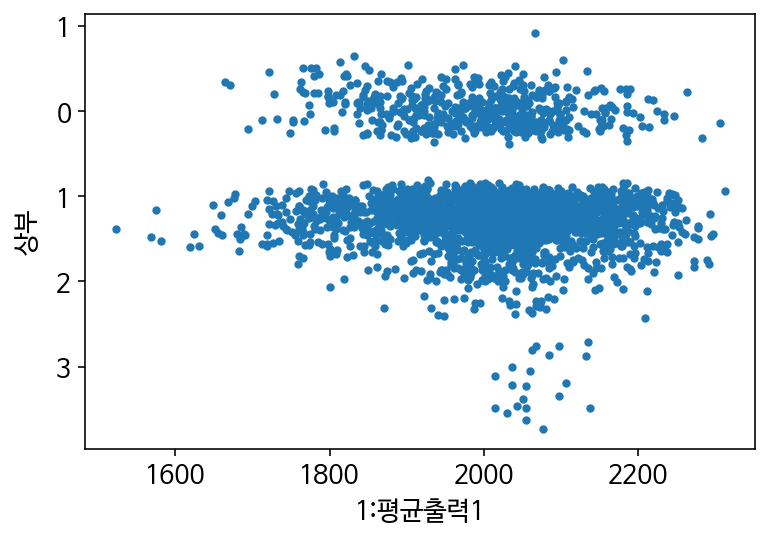

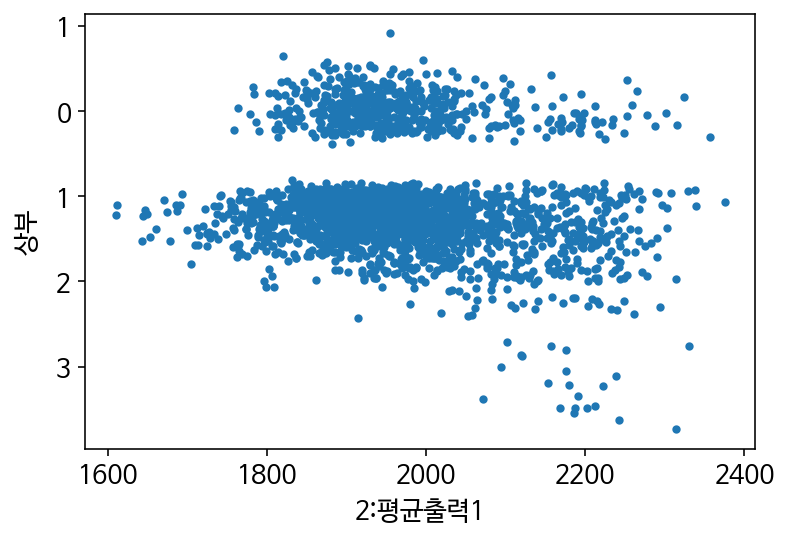

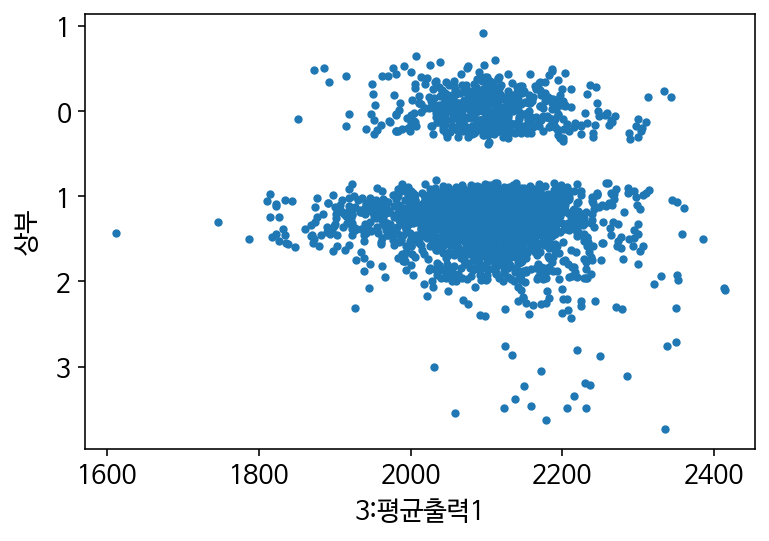

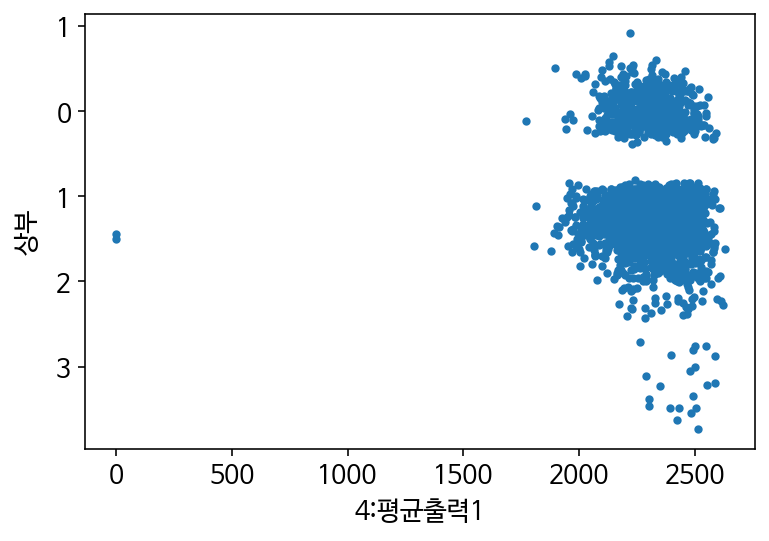

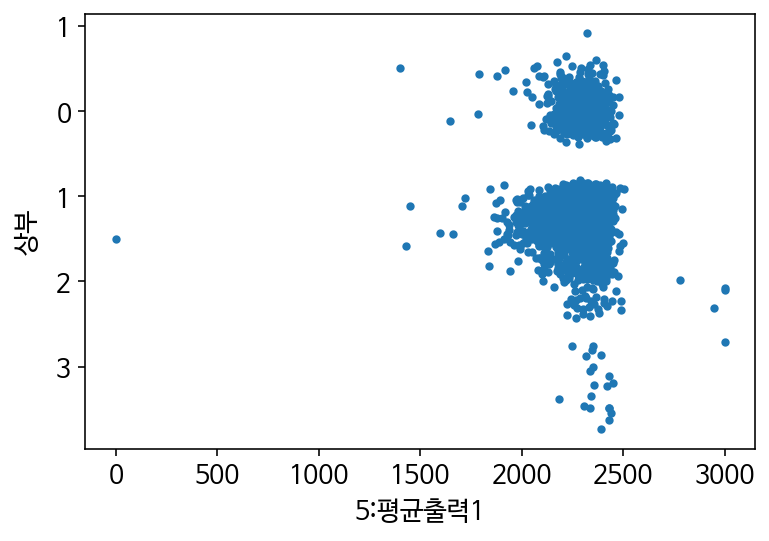

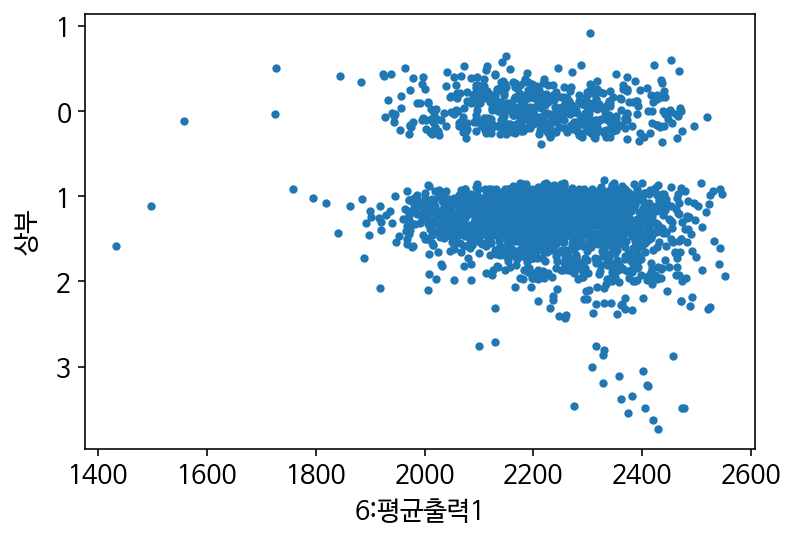

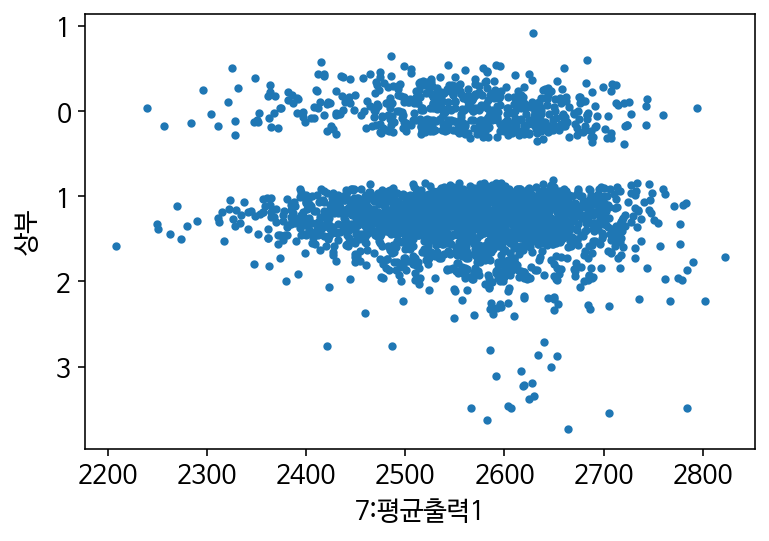

In [ ]:
for col in ["1:평균출력1", "2:평균출력1","3:평균출력1","4:평균출력1","5:평균출력1", "6:평균출력1","7:평균출력1"]:
    plt.scatter(df3[col] , df3['상부'], s=10)
    plt.ylabel('상부')
    plt.xlabel(col)
    plt.show()

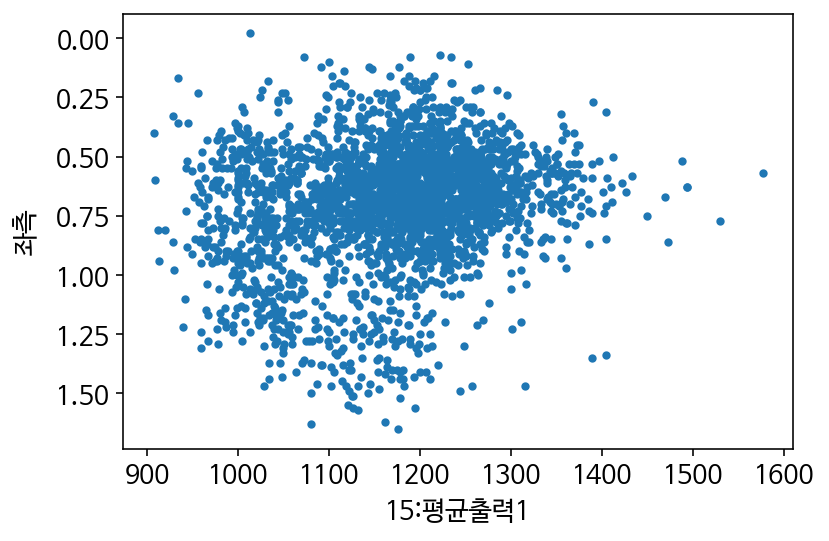

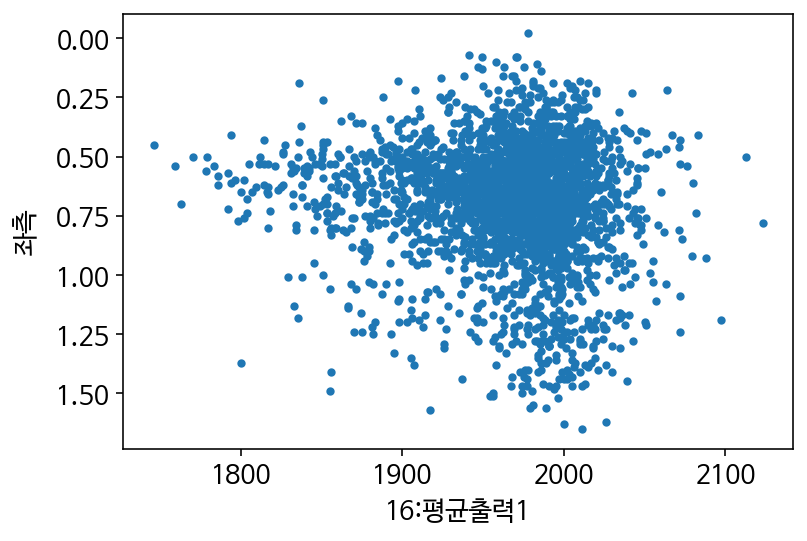

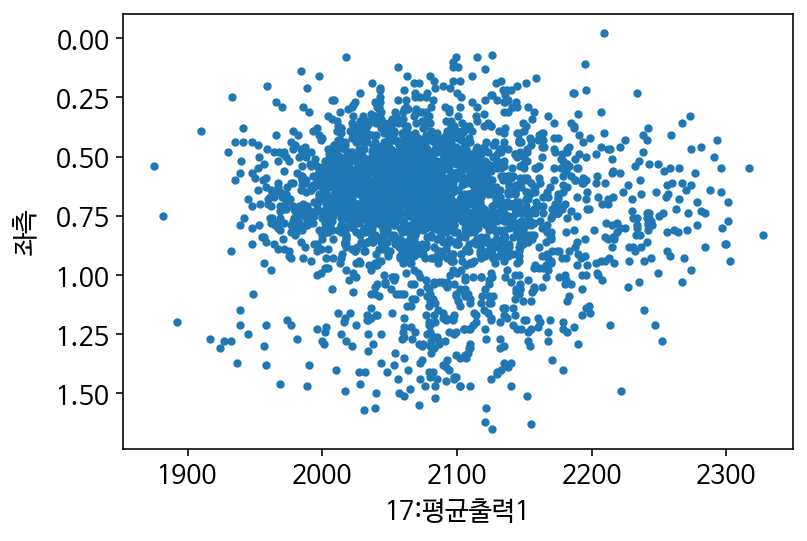

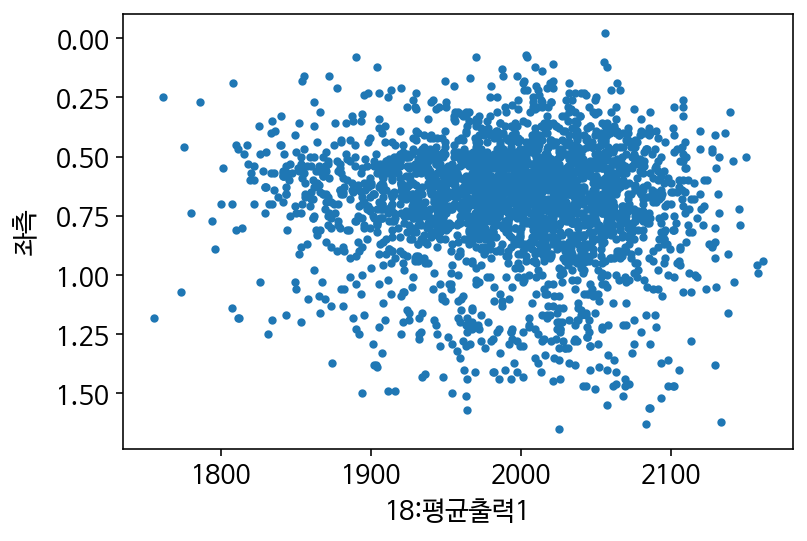

In [ ]:
for col in ["15:평균출력1", "16:평균출력1","17:평균출력1","18:평균출력1"]:
    plt.scatter(df3[col] , df3['좌측'], s=10)
    plt.ylabel('좌측')
    plt.xlabel(col)
    plt.show()

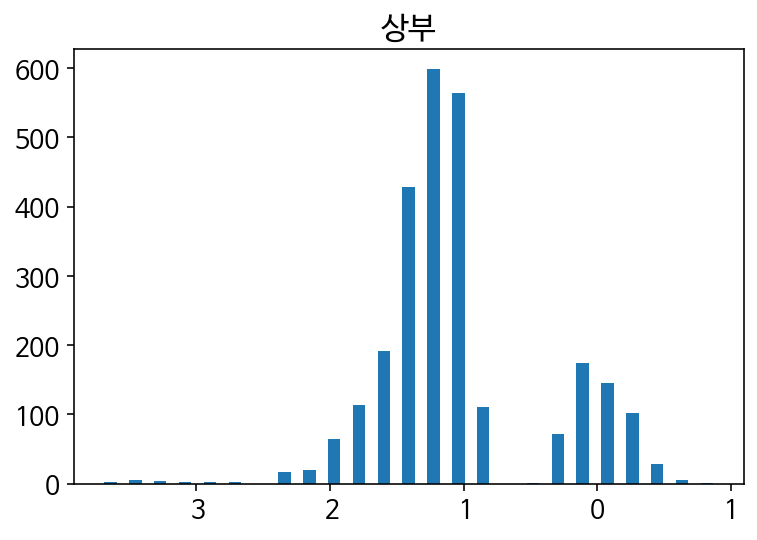

In [ ]:
for col in ["상부"]:
    plt.hist(df3[col], bins=25, rwidth=0.5)
    plt.title(col)
    plt.show()

In [20]:
## 훈련 데이터와 검증 데이터 준비

features = df3.columns.difference(["라인", "생성일시", "바코드","종합판정", "판정", "하부", "판정.1", "좌측", "판정.2", "우측", "판정.3","상부",
       '1:에너지1', '1:최대출력', '1:평균출력1',
       '2:에너지1', '2:최대출력', '2:평균출력1',
       '3:에너지1', '3:최대출력', '3:평균출력1',
       '4:에너지1', '4:최대출력', '4:평균출력1',
       '5:에너지1', '5:최대출력', '5:평균출력1',
       '6:에너지1', '6:최대출력', '6:평균출력1',
       '7:에너지1', '7:최대출력', '7:평균출력1',
       '8:에너지1', '8:최대출력', '8:평균출력1',
       '9:에너지1', '9:최대출력', '9:평균출력1',
       '10:에너지1', '10:최대출력', '10:평균출력1',
       '11:에너지1', '11:최대출력', '11:평균출력1',
       '12:에너지1', '12:최대출력', '12:평균출력1',
       '13:에너지1', '13:최대출력', '13:평균출력1',
       '14:에너지1', '14:최대출력', '14:평균출력1',
       '15:에너지1', '15:최대출력', '15:평균출력1',
       '16:에너지1', '16:최대출력', '16:평균출력1',
       '17:에너지1', '17:최대출력', '17:평균출력1',
       '18:에너지1', '18:최대출력', '18:평균출력1',
       '19:에너지1', '19:최대출력', '19:평균출력1',
       '20:에너지1', '20:최대출력', '20:평균출력1',
       '21:에너지1', '21:최대출력', '21:평균출력1',
       '22:에너지1', '22:최대출력', '22:평균출력1',
       '23:에너지1', '23:최대출력', '23:평균출력1',
       '24:에너지1', '24:최대출력', '24:평균출력1',
      ])
X = df3[features]
y = df3["판정"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4 , random_state=9, shuffle=True)

In [21]:
X_train.shape, X_test.shape

((1507, 24), (1005, 24))

In [22]:
X_train.sort_values(by='1:에너지',ascending=False)

,10:에너지,11:에너지,12:에너지,13:에너지,14:에너지,15:에너지,16:에너지,17:에너지,18:에너지,19:에너지,1:에너지,20:에너지,21:에너지,22:에너지,23:에너지,24:에너지,2:에너지,3:에너지,4:에너지,5:에너지,6:에너지,7:에너지,8:에너지,9:에너지
1266,3023,3071,3026,2590,2656,2074,3366,3501,3440,3382,4342,3584,3463,3369,3384,2066,3624,4029,4573.0,3977.0,4409,4807,2736,3243
1458,2957,2929,3001,2541,2642,2006,3289,3488,3247,3256,4303,3632,3624,3238,3356,1968,3814,4039,4617.0,3840.0,4436,4805,2690,2952
1198,3094,2976,2917,2773,2431,2197,3341,3520,3502,3544,4302,3657,3543,3343,3327,2136,3807,4106,4566.0,4475.0,4745,4943,2817,3327
806,2680,2900,2972,2762,2580,2140,3250,3430,3393,3346,4290,3598,3605,3221,3289,2080,3817,4075,4616.0,4192.0,4406,5082,2553,3234
1196,2951,3107,3181,2706,2515,2133,3235,3467,3281,3428,4279,3704,3556,3345,3498,2136,3906,4161,4704.0,4535.0,4682,4997,2559,2810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,2716,2440,2697,2224,2059,1859,3164,3423,3229,3252,3096,3490,3361,3273,3283,1997,3225,3689,4193.0,4275.0,4026,4591,2274,2494
478,2510,2508,2690,2130,2196,1888,3338,3539,3275,2760,3036,3490,3469,3216,3217,1886,3290,3461,3657.0,3977.0,3842,4302,2255,2453
655,2647,2734,2871,2090,2136,1796,3337,3321,3133,3061,3017,3453,3283,3070,3097,1917,3332,3380,3457.0,2974.0,3182,4174,2134,2557
497,2714,2782,2632,2188,2074,2042,3323,3365,3232,2995,2988,3601,3438,3305,3173,1915,3206,3466,3703.0,4012.0,3820,4026,2239,2638


In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 5)

In [31]:
# Fit the classifier to the training data
rf.fit(X_train , y_train)
# Compute accuracy on training dataset
rf.score(X_train , y_train)

1.0

In [32]:
predictions = rf.predict(X_test)
# Compute accuracy on test dataset
rf.score(X_test , y_test)

1.0

In [33]:
accuracy_score(y_test , predictions)

1.0

In [34]:
def show_clf_result(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

y_pred = dtc.predict(X_test)
show_clf_result(y_test, y_pred)

[[1005]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1005

    accuracy                           1.00      1005
   macro avg       1.00      1.00      1.00      1005
weighted avg       1.00      1.00      1.00      1005



In [38]:
def plot_feature_weight(feature, weight):
    plt.figure(figsize=(5,8))
    W = pd.DataFrame({'feature':feature,'weight':weight})
    W.sort_values('weight', inplace=True)
    plt.barh(W.feature, W.weight)

In [39]:
def show_reg_result(y_test,y_pred):
    print("Max Error: ", 
      round(np.abs(y_test - y_pred).max(),3))
    print("Mean Absolute Error: ", 
      round(np.abs(y_test-y_pred).mean(),3))
    print("Root Mean Squared Error: ", 
      mean_squared_error(y_test,y_pred, squared=False).round(3))
    print("R-Squared: ", 
      r2_score(y_test, y_pred).round(3))

1.0


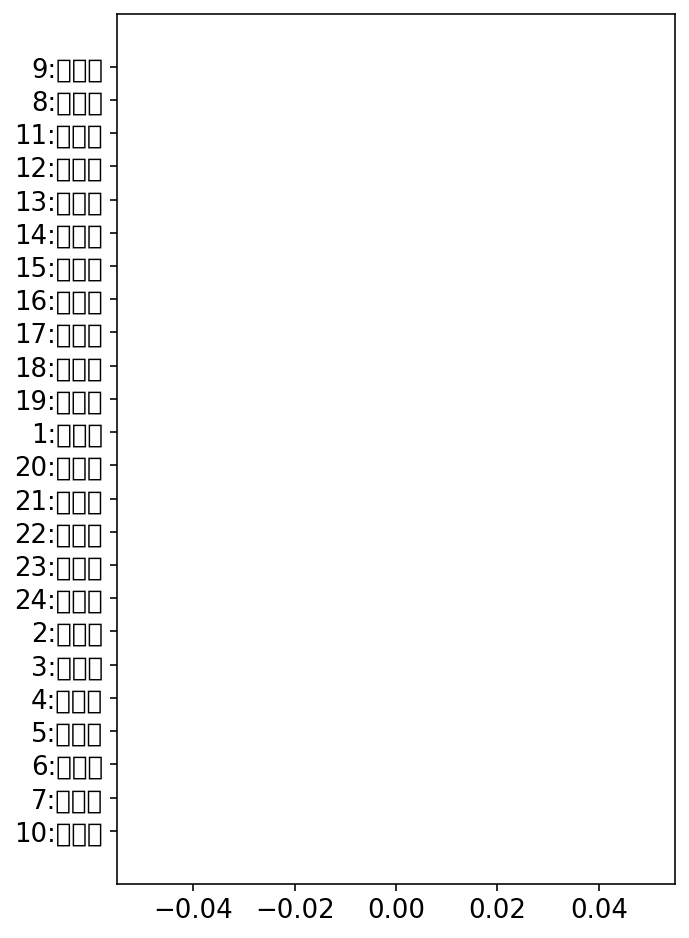

In [49]:
## 랜덤 포레스트 모델 성능 확인

dtc = DecisionTreeClassifier(max_depth=3) 
dtc.fit(X_train, y_train) 
print(dtc.score(X_test, y_test).round(3)) 

plot_feature_weight(X.columns, dtc.feature_importances_)


depth:  3 , R-squared:  0.0716


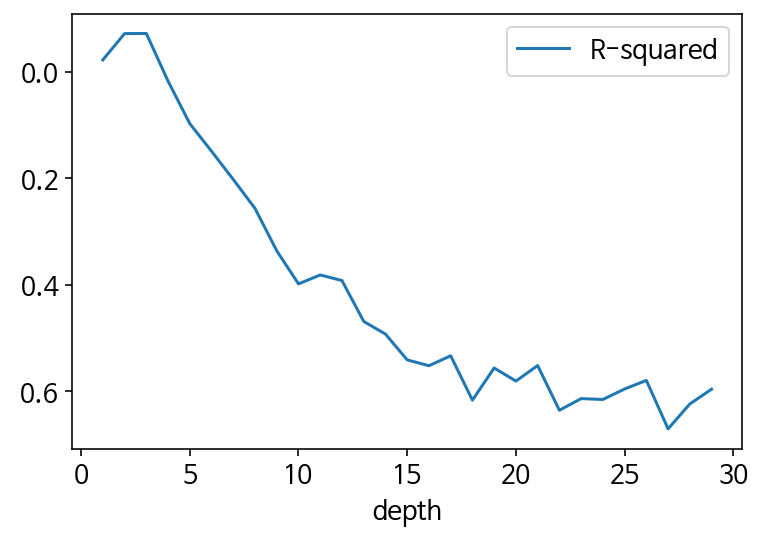

In [ ]:
|## 결정 트리를 이용한 회귀 예측

# 최적의 트리 깊이 (max_depth)를 실험으로 찾는다
res = []
for depth in range(1,30):
    dtr = DecisionTreeRegressor(max_depth=depth) 
    dtr.fit(X_train, y_train) 
    res.append((depth, dtr.score(X_test, y_test).round(4))) 

df_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth: ',df_res.idxmax()[0], ', R-squared: ',df_res.max()[0])
df_res.plot()

In [ ]:
def plot_feature_weight(feature, weight):
    plt.figure(figsize=(5,8))
    W = pd.DataFrame({'feature':feature,'weight':weight})
    W.sort_values('weight', inplace=True)
    plt.barh(W.feature, W.weight)

In [ ]:
def show_reg_result(y_test,y_pred):
    print("Max Error: ", 
      round(np.abs(y_test - y_pred).max(),3))
    print("Mean Absolute Error: ", 
      round(np.abs(y_test-y_pred).mean(),3))
    print("Root Mean Squared Error: ", 
      mean_squared_error(y_test,y_pred, squared=False).round(3))
    print("R-Squared: ", 
      r2_score(y_test, y_pred).round(3))

Max Error:  2.955
Mean Absolute Error:  0.502
Root Mean Squared Error:  0.706
R-Squared:  -0.25


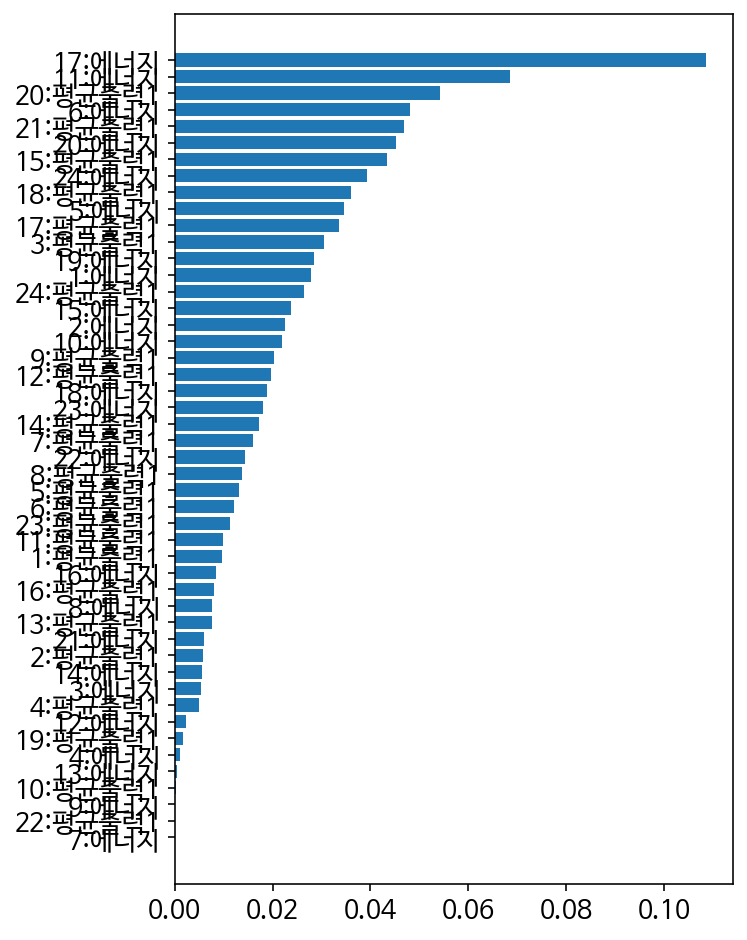

In [ ]:
## 결정 트리 모델 성능 확인

dtr = DecisionTreeRegressor(max_depth=8)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
show_reg_result(y_test,y_pred)

plot_feature_weight(X.columns, dtr.feature_importances_)

depth:  21 , R-squared:  0.215


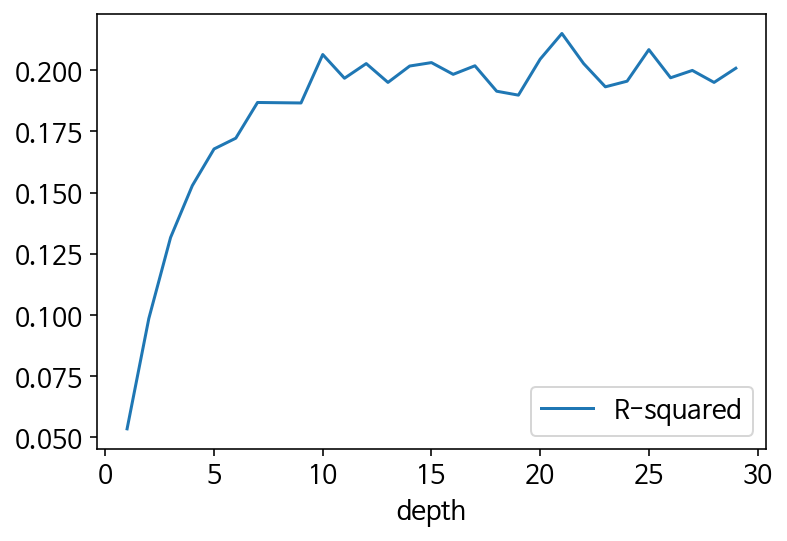

In [ ]:
## 랜덤 포레스트를 이용한 회귀 예측

# 최적의 트리 깊이 (max_depth)를 실험으로 찾는다
res = []
for depth in range(1,30):
    rfr = RandomForestRegressor(max_depth=depth) 
    rfr.fit(X_train, y_train) 
    res.append((depth, rfr.score(X_test, y_test).round(4))) 

df_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth: ',df_res.idxmax()[0], ', R-squared: ',df_res.max()[0])
df_res.plot()

Max Error:  2.063
Mean Absolute Error:  0.424
Root Mean Squared Error:  0.565
R-Squared:  0.201


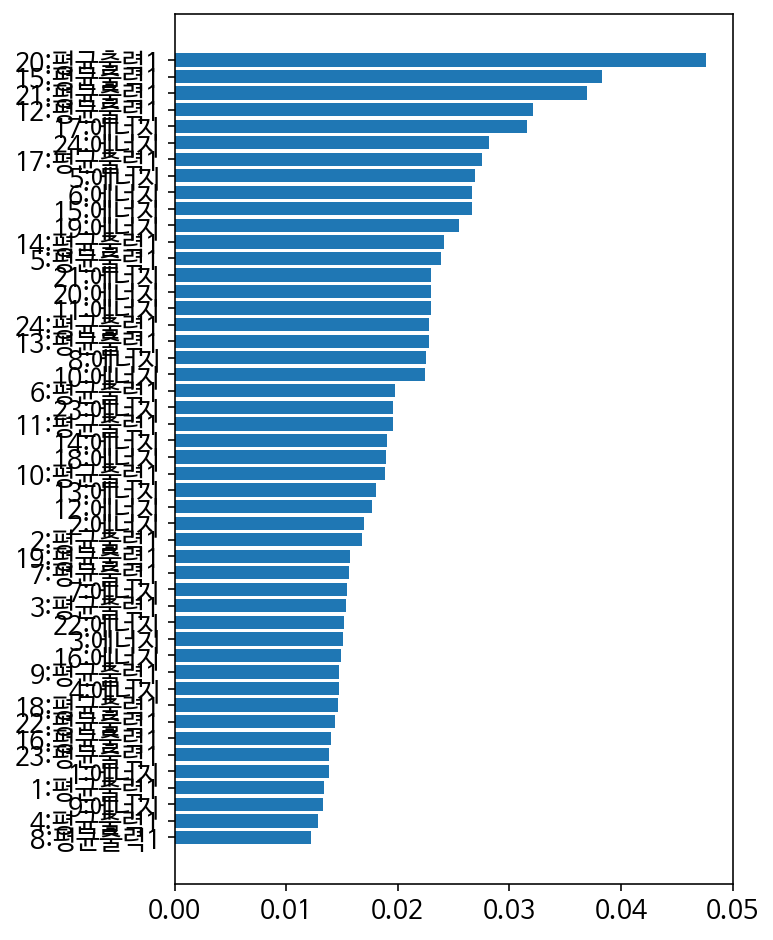

In [ ]:
## 랜덤 포레스트 모델 성능 확인

rfr = RandomForestRegressor(max_depth=18)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
show_reg_result(y_test,y_pred)

plot_feature_weight(X.columns, rfr.feature_importances_)

depth:  5 , R-squared:  0.2259


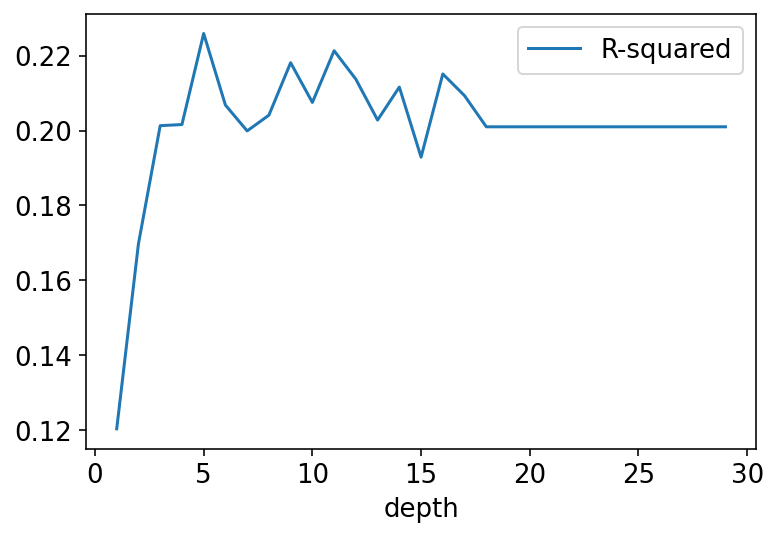

In [ ]:
## LightGBM 부스팅 모델을 이용한 회귀 예측

# 최적의 트리 깊이 (max_depth)를 실험으로 찾는다
res = []
for depth in range(1,30):
    lgbm_r = LGBMRegressor(max_depth=depth, num_leaves=32) 
    lgbm_r.fit(X_train, y_train, eval_set=(X_test, y_test), 
           early_stopping_rounds=5, verbose=False)
    res.append((depth, lgbm_r.score(X_test, y_test).round(4))) 

df_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth: ',df_res.idxmax()[0], ', R-squared: ',df_res.max()[0])
df_res.plot()

Max Error:  1.938
Mean Absolute Error:  0.424
Root Mean Squared Error:  0.565
R-Squared:  0.201


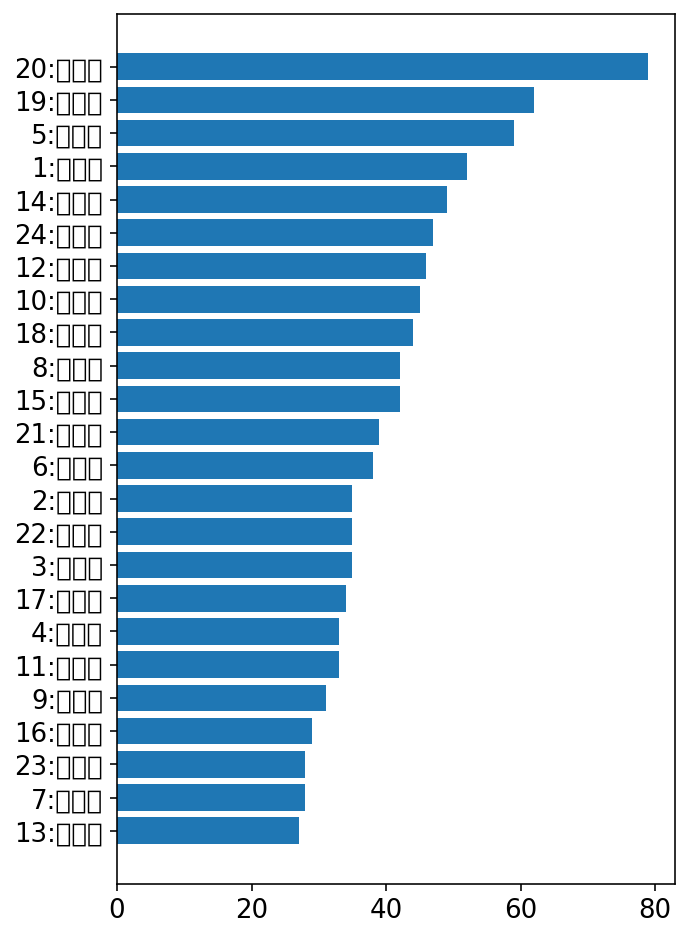

In [ ]:
## 부스팅 모델 성능 확인

lgbm_r = LGBMRegressor(max_depth=19, num_leaves=32)
lgbm_r.fit(X_train, y_train, eval_set=(X_test, y_test), 
           early_stopping_rounds=5, verbose=False)
y_pred = lgbm_r.predict(X_test)
show_reg_result(y_test,y_pred)

plot_feature_weight(X.columns, lgbm_r.feature_importances_)

In [ ]:
y_test

2302   -1.15
204    -1.63
2503   -1.30
2523   -1.23
1528   -1.95
        ... 
1464   -1.22
304    -3.19
2419    0.01
224    -0.93
1095   -1.38
Name: 상부, Length: 1077, dtype: float64

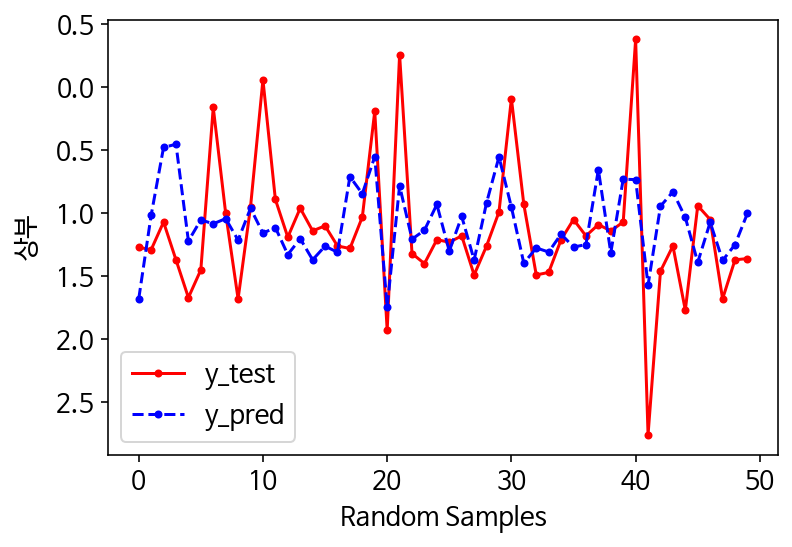

In [ ]:
## 회귀 예측과 실제값 샘플 비교하기

def plot_reg_result(y_test, y_pred, N=50):
    y_test = y_test.values
    plt.plot(y_test[:N], 'r.-', label='y_test')
    plt.plot(y_pred[:N], 'b.--', label='y_pred')
    plt.legend()
    plt.xlabel("Random Samples")
    plt.ylabel("상부")
    plt.show()

y_pred = lgbm_r.predict(X_test)
plot_reg_result(y_test, y_pred)